### Estatística descritiva
  
Usando:  
  - Pandas
  - Numpy
  - Matplotlib e Seaborn

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### O que é frequência?

### Frequência é a contagem de eventos dado um experimento

### Exemplo: se jogar um dado 100 veze qual a frequência de cada número?

In [2]:
# dê vários ctrl+enter
dado = np.random.randint(1, 7)
dado

3

In [3]:
### Vamos jogar 100 vezes este dados
N = 100

dados = np.random.randint(1, 7, size=N)
dados

array([3, 6, 4, 4, 3, 2, 1, 3, 2, 5, 3, 4, 1, 4, 4, 1, 4, 6, 6, 6, 3, 3,
       6, 3, 6, 1, 1, 2, 5, 3, 6, 3, 1, 5, 5, 2, 2, 6, 3, 3, 3, 5, 6, 4,
       1, 2, 1, 4, 4, 6, 1, 1, 5, 4, 3, 4, 6, 1, 2, 1, 3, 6, 4, 6, 2, 2,
       6, 3, 2, 3, 3, 4, 1, 2, 1, 2, 1, 5, 4, 5, 5, 4, 4, 3, 2, 2, 2, 2,
       1, 2, 5, 5, 5, 2, 3, 3, 6, 6, 1, 4])

### Qual a frequência?

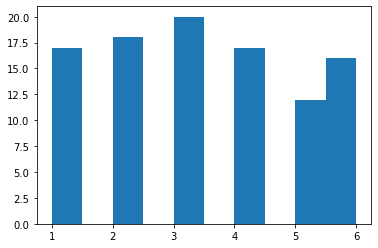

In [4]:
plt.hist(dados);

### Aumente o número de jogadas
### Aproxima-se de uma distribuição UNIFORME?

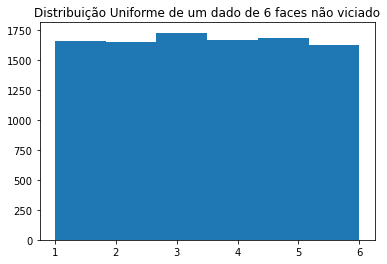

In [5]:
N = 10000

dados = np.random.randint(1,7, size=N)
ret = plt.hist(dados, bins=6)
plt.title("Distribuição Uniforme de um dado de 6 faces não viciado");
plt.xticks([1,2,3,4,5,6]);

### Vamos melhorar o tamanho da figura

In [6]:
ret

(array([1658., 1650., 1726., 1663., 1681., 1622.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

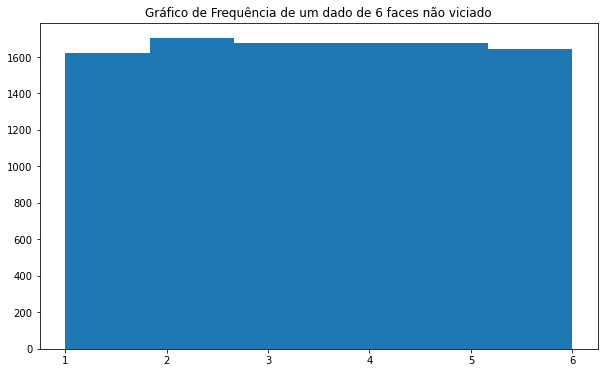

In [7]:
fig = plt.figure(figsize=(10,6))
N = 10000

dados = np.random.randint(1, 7, size=N)
plt.hist(dados, bins=6)
plt.title("Gráfico de Frequência de um dado de 6 faces não viciado");
plt.xticks([1,2,3,4,5,6]);

### O que é uma distribuição?

Distribuição é uma função matemática cuja integral (soma de todos os valores) é igual a 1 (hum) ou 100% (cem porcento). Ela representa todos os possíveis probabilidades que um dado evento (ou valor) possa ser selecionado (sorteado).  

<font size="5">$\sum_{i=1}^2{p_i} = 1$</font>

### Vamos normalizar o gráfico de frequências para se tornar uma distriução

(array([1623., 1703., 1676., 1679., 1675., 1644.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

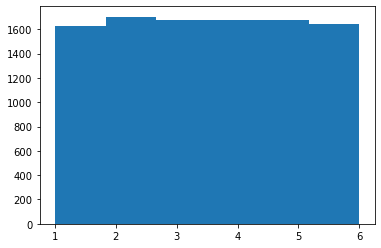

In [8]:
ret = plt.hist(dados, bins=6);
ret

In [9]:
vals = ret[0]
len(vals), vals

(6, array([1623., 1703., 1676., 1679., 1675., 1644.]))

In [10]:
# Normalizando
vals = [x / np.sum(vals) for x in vals]
vals

[0.1623, 0.1703, 0.1676, 0.1679, 0.1675, 0.1644]

In [11]:
np.sum(vals)

0.9999999999999999

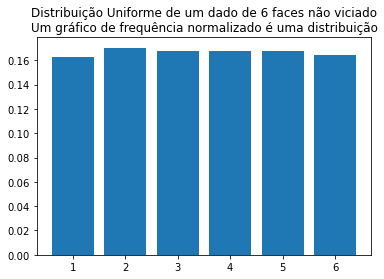

In [12]:
plt.bar(np.arange(1,7), vals);
plt.title("Distribuição Uniforme de um dado de 6 faces não viciado\nUm gráfico de frequência normalizado é uma distribuição");

A distribuição mais simples é a de uma moeda sendo jogada para o ar e analisado seu resultado quando parar de se movimentar ao chegar ao solo. Se a moeda é não viciada, a probabilidade de dar cara é igual à probabilidade de dar corroa = 0.5 = 50%. 

<font size="5">p(Cara) = p(Coroa) = .5</font>

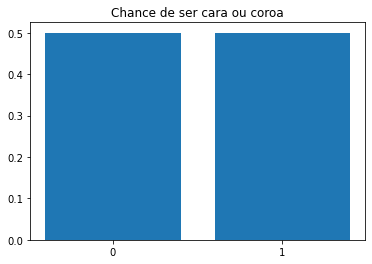

In [13]:
pCara = 0.5
pCoroa = 0.5

x = [pCara, pCoroa]

plt.bar([0,1], [pCara, pCoroa])
plt.xticks([0,1])
plt.title("Chance de ser cara ou coroa");

### Desenhe uma distribuição de uma moeda viciada

### Qual a diferença entre uma distribuição contínua e uma discreta

  - uma distribuição discreta: os possíveis valores amostrados são discretos como 0,1,2,3 ...
    - p.ex.: distribuição binomial
  - uma distribuição contínua: os possíveis valores amostrados são contínuos como o intervalor entre [0, 5]
    - p.ex.: distribuição nomal

### Distriubição normal

[distribuição normal - wiki](https://en.wikipedia.org/wiki/Normal_distribution)  

[distribuição normal - Portal Action](http://www.portalaction.com.br/probabilidades/62-distribuicao-normal)  

[distribuição normal - Khan academi](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/normal-distributions-library/v/ck12-org-normal-distribution-problems-qualitative-sense-of-normal-distributions)  


### A distribuição normal é uma distribuição contínua e paramétrica
  - contínua: domínio dos números Reais [-infinito a +infinto]
  - paramétrica: só depende da MEDIA e do DESVIO PADRÃO

### Gerando distribuições normais (Gaussianas)

In [14]:
MU = 20
SD = 2
N = 1000

x = np.random.normal(MU, SD, N)
x[:10]

array([25.39900653, 21.83461614, 20.40124537, 25.30081622, 19.3099148 ,
       21.22950772, 19.34813078, 19.50289948, 21.42418663, 16.82496146])

In [15]:
np.mean(x), np.median(x)

(20.096146181936536, 20.176373726417403)

### Entenda a máquina randômica (estocástica) gerando estes valores
  - rode várias vezes a célula abaixo
  - os números variam?

In [16]:
x = np.random.normal(MU, SD, N)
np.mean(x), np.median(x)

(19.907948257661012, 19.988160519182706)

  - rode várias vezes a célula abaixo
  - os números variam? NÃO. Porque?

In [17]:
np.random.seed(3)
x = np.random.normal(MU, SD, N)
np.mean(x), np.median(x)

(20.034568665961668, 20.078100103336823)

### Esta distribuição é:
  - contínua
  - centrada em 20 (media)
  - tem uma dispersão (desvio padrão) = 2
    
### Agora procure:
  - quantas amostras são maiores que 20+4, > 24
  - quantas amostras são menores que 20-4, < 16

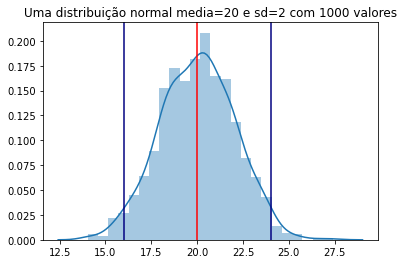

In [18]:
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(MU, SD, N))
ax.axvline(MU, color='red')
ax.axvline(MU+2*SD, color='navy')
ax.axvline(MU-2*SD, color='navy');

In [19]:
maiores = x[ x > MU + 2*SD]
len(maiores), maiores

(18,
 array([24.31629868, 25.35222494, 25.62375675, 24.91517525, 24.14175705,
        25.42385267, 24.63171719, 24.03930128, 24.09266555, 24.38752631,
        24.17929775, 26.62860848, 24.60949809, 27.40491648, 24.63554942,
        25.02383376, 24.10220656, 24.06915356]))

In [20]:
p = len(maiores) / len(x)
"Encontramos %d valores maiores que %.2f, ou seja %.2f%%"%(len(maiores), MU + 2*SD, p*100)

'Encontramos 18 valores maiores que 24.00, ou seja 1.80%'

In [21]:
menores = x[ x < MU - 2*SD]
len(menores), menores

(22,
 array([15.16183365, 15.50348446, 14.1685245 , 15.93921289, 14.62978264,
        15.28157052, 15.45551177, 15.43641537, 15.94185575, 15.56516478,
        14.03205959, 14.64695727, 15.57841672, 15.95837904, 15.47551741,
        15.71296895, 14.04574938, 15.89237266, 15.35060234, 15.45490346,
        15.387461  , 15.62105226]))

In [22]:
p = len(menores) / len(x)
"Encontramos %d valores menores que %.2f, ou seja %.2f%%"%(len(menores), MU - 2*SD, p*100)

'Encontramos 22 valores menores que 16.00, ou seja 2.20%'

### Repare que:
  - há aproximadamente 2.5% de valores maiores que MU + 2*SD (acima de 2 desvios padrões)
  - há aproximadamente 2.5% de valores menores que MU - 2*SD (abaixo de 2 desvios padrões)
  - por esta razão, veremos mais adiante, estima-se com referência um p-value = 0.05 = 5% 
  - quando se estuda valores abaixo e acima de uma distribuição dis-se que a distribuição é bi-caudal
  - exemplos:
    - pessoas muito magras ou muito gordas: estudo bi-caudal
    - homens acima de 2 metros: estudo mono-caudal
    

### Distribuição binomial

### Caso mais simples: a moeda
  - vamos jogar uma só vez
  - há duas possibiliades: cara ou coroa (n = 2)
  - não viciado então p = .5

In [23]:
n = 1    # uma moeda - n = numero de jogadas simultâneas
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 1    # vamos jogar somente uma vez


# dê CTRL-enter várias vezes
jogo = np.random.binomial(n, p, N)
list(jogo)

[1]

### Vamos jogar 10 vezes a moeda

In [24]:
n = 1    # uma moeda - n = numero de jogadas simultâneas
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 10   # vamos jogar 10 vezes

jogo = np.random.binomial(n, p, N)
list(jogo)

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0]

### Lembra do que é media?
  - media é o valor esperado
    
<font size="5">\<x> = E[x] = media de x = $\frac{\sum_{i=1}^n{x_i}}{n}$</font>

### O que acontece de jogar 100 vezes e tirar a media?

In [25]:
n = 1    # uma moeda - n = numero de jogadas simultâneas
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 100  # vamos jogar 100 vezes

jogo = np.random.binomial(n, p, N)
np.mean(jogo)

0.49

### O que acontece de jogar 1000 vezes e tirar a media?

In [26]:
N = 1000
jogo = np.random.binomial(n, p, N)
np.mean(jogo)

0.48

### O que acontece de jogar 10.000 vezes e tirar a media?

In [27]:
N = 10000
jogo = np.random.binomial(n, p, N)
np.mean(jogo)

0.4908